In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [3]:
df = pd.read_csv(r"C:\Users\bhavy\Desktop\Phani\Projects\Movies\movies.csv")
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Lets check for any missing data in all columns 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
# Data types for columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
df['budget'] = df['budget'].astype('Int64')

df['gross'] = df['gross'].astype('Int64')

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,<NA>,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,<NA>,<NA>,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,<NA>,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,<NA>,NaN,120.0


In [7]:
df[['released_month', 'yearcountry']]=df['released'].str.split(',', 2, expand=True)

In [8]:
df['yearcountry'].head(5)

0     1980 (United States)
1     1980 (United States)
2     1980 (United States)
3     1980 (United States)
4     1980 (United States)
Name: yearcountry, dtype: object

In [9]:
df['yearcorrected'] = df['yearcountry'].str.extract(r'(\d{4})')

In [10]:
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_month,yearcountry,yearcorrected
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June 13,1980 (United States),1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July 2,1980 (United States),1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June 20,1980 (United States),1980


In [11]:
df.sort_values(by=['gross'], inplace=False, ascending=False).head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_month,yearcountry,yearcorrected
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,December 18,2009 (United States),2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,April 26,2019 (United States),2019


In [12]:
## Finding co-relations in the data
# High correlation with budget(with respect to gross)
# High corelation with company

In [13]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 

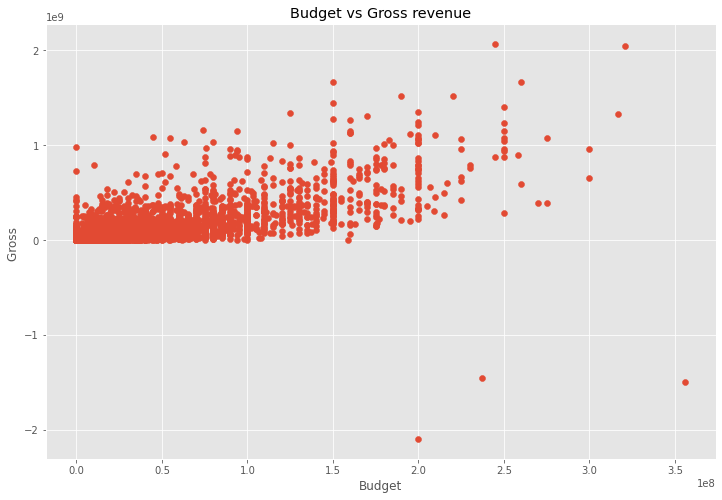

In [14]:
## Let's do scatter plot with budget vs gross revenue

plt.scatter(x= df['budget'], y=df['gross'])
plt.title('Budget vs Gross revenue')
plt.xlabel('Budget')
plt.ylabel('Gross ')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

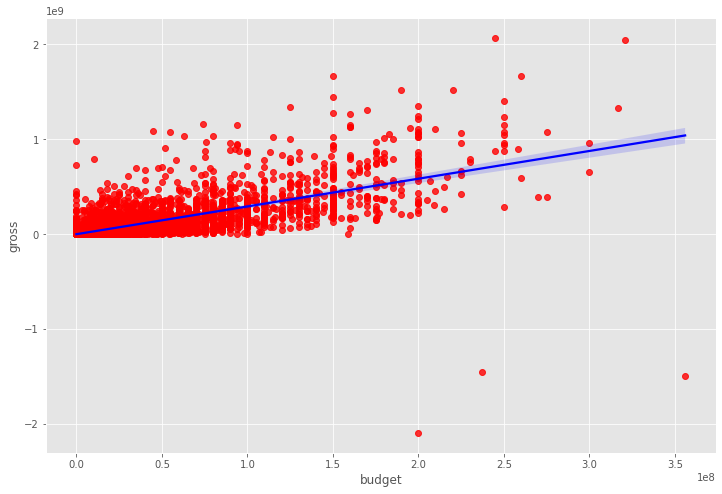

In [15]:
sns.regplot(x='budget', y= 'gross', data=df, scatter_kws= {"color" : "red"}, line_kws={"color" : "blue"})

In [16]:
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261092,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.173680,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.588068,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.704237,0.269510
gross,0.261092,0.173680,0.588068,0.704237,1.000000,0.210915
runtime,0.120811,0.399451,0.309212,0.269510,0.210915,1.000000


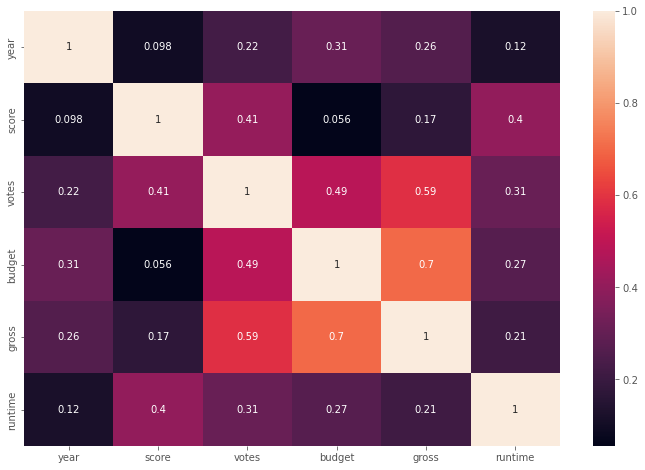

In [17]:
# Let's do corelation matrx

corelation_matrix = df.corr(method='pearson')
sns.heatmap(corelation_matrix, annot=True)
plt.show()

In [18]:
df.dtypes

name               object
rating             object
genre              object
year                int64
released           object
score             float64
votes             float64
director           object
writer             object
star               object
country            object
budget              int32
gross               int32
company            object
runtime           float64
released_month     object
yearcountry        object
yearcorrected      object
dtype: object

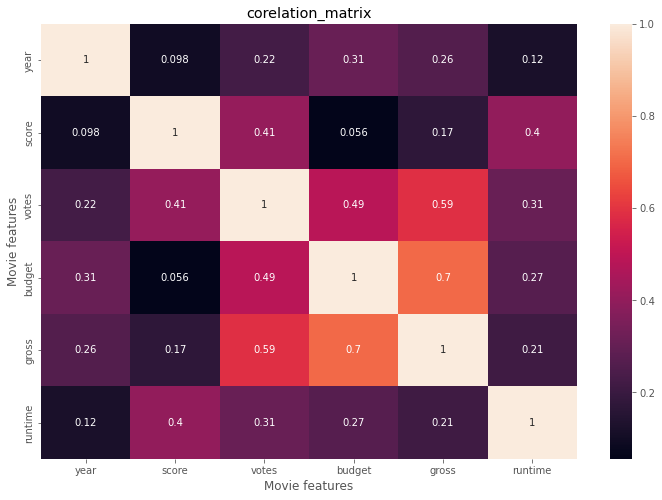

In [27]:
corelation_matrix = df.corr(method='pearson')
sns.heatmap(corelation_matrix, annot=True)
plt.title('corelation_matrix')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [28]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_month,yearcountry,yearcorrected
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June 13,1980 (United States),1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July 2,1980 (United States),1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June 20,1980 (United States),1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July 2,1980 (United States),1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July 25,1980 (United States),1980


In [29]:
df.dtypes

name               object
rating             object
genre              object
year                int64
released           object
score             float64
votes             float64
director           object
writer             object
star               object
country            object
budget              int32
gross               int32
company            object
runtime           float64
released_month     object
yearcountry        object
yearcorrected      object
dtype: object

In [30]:
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes


df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_month,yearcountry,yearcorrected
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,212,3,0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,188,3,0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,223,3,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,188,3,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,194,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000,0,-1,90.0,367,526,40
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,0,0,539,90.0,138,526,40
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750,0,941,NaN,32,523,40
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000,0,-1,120.0,349,526,40


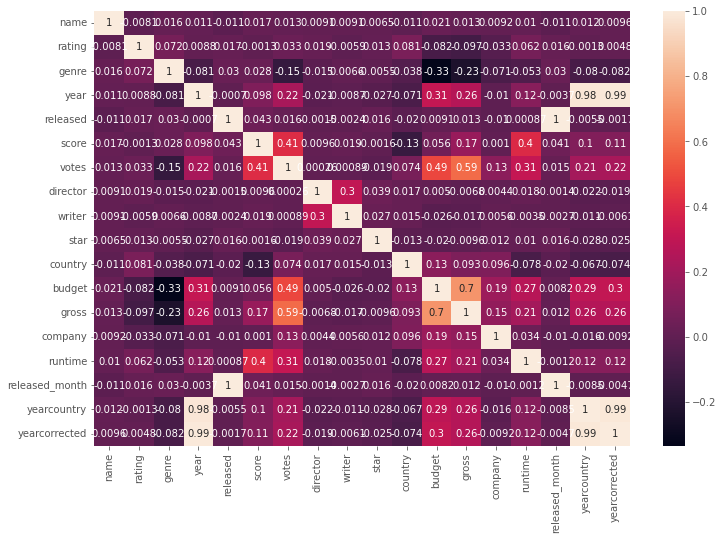

In [31]:
corelation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(corelation_matrix, annot=True)
plt.show()

In [ ]:
corelation_matrix = df_numerized.corr()
corr_pairs = corelation_matrix.unstack()
corr_pairs

In [36]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget          genre            -0.334021
genre           budget           -0.334021
gross           genre            -0.234036
genre           gross            -0.234036
                votes            -0.145307
votes           genre            -0.145307
score           country          -0.133348
country         score            -0.133348
gross           rating           -0.096761
rating          gross            -0.096761
genre           yearcorrected    -0.082070
yearcorrected   genre            -0.082070
budget          rating           -0.081939
rating          budget           -0.081939
genre           year             -0.081261
year            genre            -0.081261
yearcountry     genre            -0.080101
genre           yearcountry      -0.080101
country         runtime          -0.078412
runtime         country          -0.078412
yearcorrected   country          -0.074166
country         yearcorrected    -0.074166
company         genre            -0.071067
genre      

In [37]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes           gross             0.588068
gross           votes             0.588068
                budget            0.704237
budget          gross             0.704237
year            yearcountry       0.980716
yearcountry     year              0.980716
                yearcorrected     0.985065
yearcorrected   yearcountry       0.985065
year            yearcorrected     0.992136
yearcorrected   year              0.992136
released_month  released          0.999759
released        released_month    0.999759
name            name              1.000000
released_month  released_month    1.000000
rating          rating            1.000000
genre           genre             1.000000
year            year              1.000000
released        released          1.000000
score           score             1.000000
votes           votes             1.000000
yearcountry     yearcountry       1.000000
director        director          1.000000
star            star              1.000000
country    

In [ ]:
# Votes and gross have high correlation
    